In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#read the dataset
df = pd.read_csv('Advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# visualization

<Axes: xlabel='TV', ylabel='Sales'>

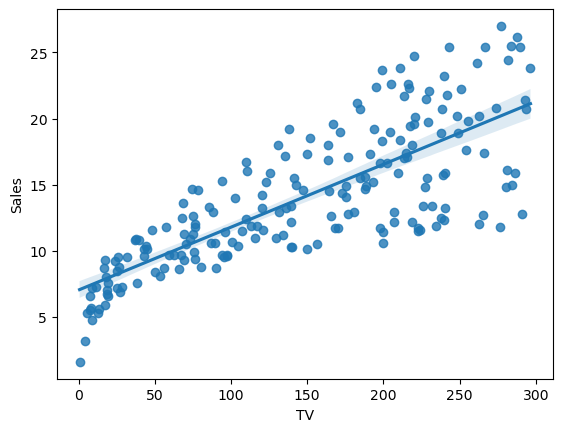

In [14]:
sns.regplot(x = 'TV', y = 'Sales', data=df)

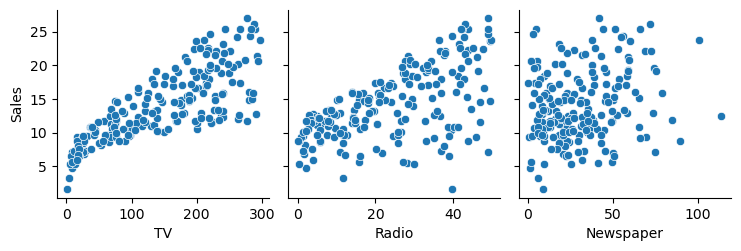

In [16]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars = 'Sales')

In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

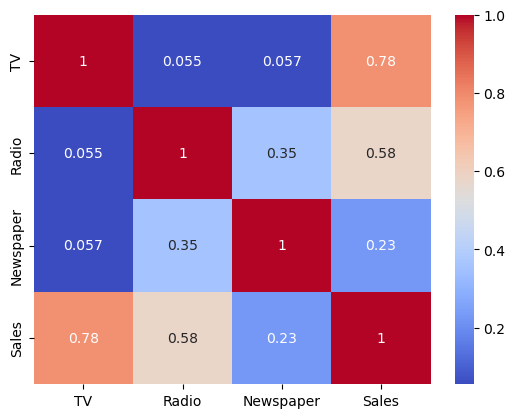

In [20]:
sns.heatmap(df.corr(), annot = True , cmap = 'coolwarm')

# Simple Linear Regression

### Model used : Ordinary Least Squares(OLS)

In [22]:
import statsmodels
import statsmodels.api as sm
import sklearn

Steps : 
    = create X and Y
    
    
    = create train and test sets(70/30,80/20)
    
    = Train your model on the training set(learn the  coefficiensts)
    
    Evaluate the model (training and tests set)

In [23]:
X = df['TV']
Y = df['Sales']

In [25]:
#train test split
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 100)

In [27]:
X_train.shape

(140,)

In [28]:
X_test.shape

(60,)

In [29]:
#training the model for Statsmodel
X_train_sm = sm.add_constant(X_train)

In [30]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [32]:
#fitting the model Oridinary Least Squares
lr = sm.OLS(Y_train,X_train_sm)

In [33]:
lr_model = lr.fit()

In [35]:
lr_model.params

const    6.989666
TV       0.046497
dtype: float64

In [36]:
# Sales = 6.98 + 0.0464 *TV

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           2.84e-30
Time:                        13:02:45   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.000       5.907       8.073
TV             0.0465      0.003     14.798      0.000       0.040       0.053
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.970
Skew:                          -0.008   Prob(JB):                        0.616
Kurtosis:                       2.593   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value 0 -> signifies that the coefficients are significant

The value that we got is not merely by chance but there is linear relationship

In [40]:
#  1.  coef and p value
#  2. R squared is 0.613, considerably high
#  3. P(F statistic) is low => the fit is not by chance

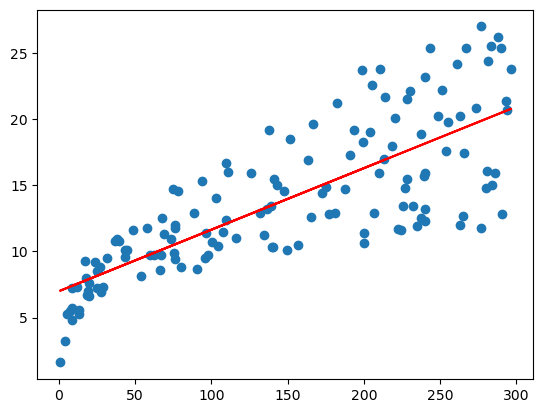

In [45]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.9897 + 0.0465*X_train , color = 'r')
plt.show()

In [46]:
#Residual Analysis

In [47]:
#error = f(y_train, y_train_pred)

In [48]:
Y_train_pred = lr_model.predict(X_train_sm)

In [49]:
Y_train_pred

74     16.912202
3      14.034016
185    16.521624
26     13.634138
90     13.234261
         ...    
87     12.136923
103    15.726520
67     13.466748
24      9.886451
8       7.389543
Length: 140, dtype: float64

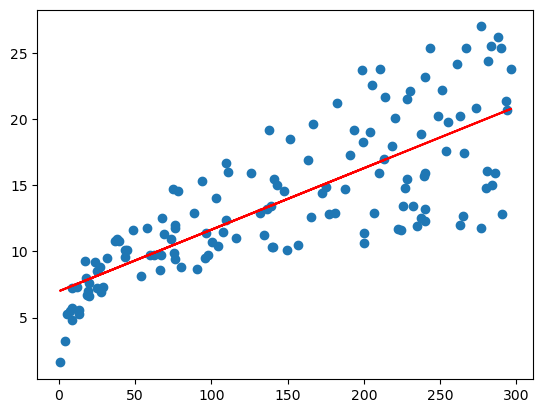

In [50]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_train_pred , color = 'r')
plt.show()

In [51]:
res = Y_train - Y_train_pred

Text(0.5, 1.0, 'Residual plot')

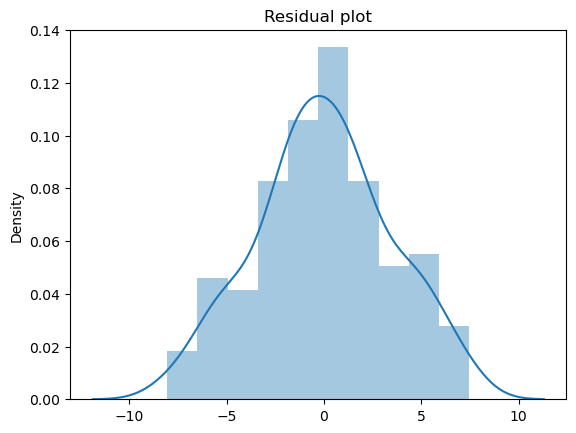

In [60]:
plt.figure()
sns.distplot(res)
plt.title('Residual plot')

Normally distributed

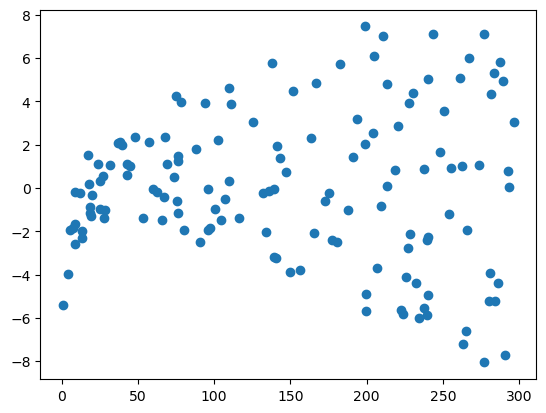

In [61]:
# look for patterns in residuals
plt.scatter(X_train, res)

No visible pattern

# Predictopns and Evaluation on the Test Set

In [62]:
X_test_sm = sm.add_constant(X_test)
Y_test_pred = lr_model.predict(X_test_sm)

In [65]:
#evaluation , r squared
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [67]:
r2 = r2_score(Y_test, Y_test_pred)

In [68]:
r2

0.59429872677833

In [69]:
# on training set
r2_score(Y_train,Y_train_pred)

0.6134312469429994

In [70]:
#mean Squared error
mean_squared_error(Y_test, Y_test_pred)

7.975798532854854

In [73]:
# Viz on test set

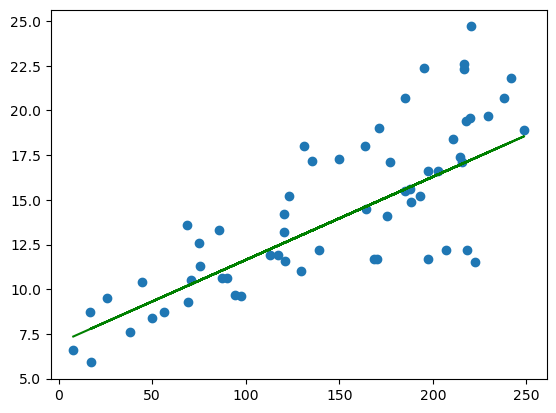

In [72]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred , color = 'g')
plt.show()

# Linear regression using Sklearn

Steps :
    
    1. create an object of linear regression
    
    2. fir the model
    
    3.see the params , make prediction
   
    4. evaluate the model(r2 etc)

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 100)

In [80]:
#reshape x_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [79]:
X_train_lm.shape

(140, 1)

In [81]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()   # Create a linear regression object
lm.fit(X_train_lm, Y_train)

LinearRegression()

In [83]:
#see param
print(lm.coef_)
print(lm.intercept_)

[0.04649736]
6.989665857411677


In [84]:
#make predictions
Y_train_pred = lm.predict(X_train_lm)
Y_test_pred = lm.predict(X_test_lm)

In [87]:
#Evaluate
print('R Squared error on training set = ',r2_score(Y_train, Y_train_pred))
print('R Squared error on test set = ',r2_score(Y_test, Y_test_pred))

R Squared error on training set =  0.6134312469429992
R Squared error on test set =  0.5942987267783302
